# Feature Engineering

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
import os
import matplotlib.dates as mdates
import math
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFECV
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import ast
import warnings
warnings.filterwarnings('ignore')

In [2]:
def convert_to_list(value):
    if isinstance(value, str): 
        try:
            return ast.literal_eval(value)  
        except:
            return [value.strip()]  
    elif isinstance(value, list):
        return value 
    else:
        return [] 

In [3]:
df = pd.read_csv("CleanData.csv")
df.columns = df.columns.str.replace(" Name", "", regex=False)
df

,Posted Time,Category,Ward,District,Street,Area,Width,Length,Land Type,Legal Status,House Direction,Property Features,Floors,Rooms,Toilets,Furnishing Sell,Price per m2
0,31/01/2025,Đất,Phường Hòa Phát,Quận Cẩm Lệ,Vũ lăng,100.0000,5.0,20.00000,4,5.0,6.0,"['No Residential', 'Back Expansion', '1 Part R...",0.0,0.0,0.0,0.0,2.500000
1,01/02/2025,Đất,Phường Hòa Khánh Bắc,Quận Liên Chiểu,Âu cơ,100.0000,5.0,20.00000,4,5.0,4.0,"['No Residential', 'Back Expansion']",0.0,0.0,0.0,0.0,2.500000
2,13/01/2025,Đất,Phường Hòa Khánh Nam,Quận Liên Chiểu,Đường Nam Cao,75.0000,5.0,15.00000,4,6.0,4.0,['No Residential'],0.0,0.0,0.0,0.0,3.733333
3,07/02/2025,Đất,Xã Hòa Tiến,Huyện Hòa Vang,DT605,153.0000,5.0,30.00000,1,1.0,5.0,"['Frontage', '1 Part Residential']",0.0,0.0,0.0,0.0,2.712418
4,02/02/2025,Đất,Xã Hòa Sơn,Huyện Hòa Vang,Phú thượng,100.0000,5.0,20.00000,1,1.0,6.0,"['Back Expansion', 'No Residential']",0.0,0.0,0.0,0.0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15902,08/04/2025,Nhà ở,Phường Hòa Cường Nam,Quận Hải Châu,Đường Huỳnh Tấn Phát,98.0000,5.0,19.00000,0,1.0,2.0,['No thing'],3.0,3.0,4.0,2.0,117.346940
15903,11/04/2025,Nhà ở,Phường Phước Mỹ,Quận Sơn Trà,Đường Chính Hữu,90.6999,5.0,18.13998,0,1.0,4.0,['No thing'],1.0,2.0,2.0,1.0,148.842500
15904,09/04/2025,Nhà ở,Phường Thuận Phước,Quận Hải Châu,Đường Đống Đa,72.0000,5.0,14.40000,0,1.0,6.0,['No thing'],4.0,4.0,5.0,1.0,191.666670
15905,09/04/2025,Nhà ở,Phường An Hải Bắc,Quận Sơn Trà,Đường Chính Hữu,100.0000,5.0,20.00000,0,1.0,5.0,['No thing'],3.0,5.0,3.0,2.0,165.000000


In [4]:
def plot_avg_price_by_date(data, date_col="Posted Time", price_col="Price per m2"):
    """
    Plots the average price per day from the provided DataFrame.

    Parameters:
    - data (DataFrame): The DataFrame containing date and price data.
    - date_col (str): The name of the column containing the date information.
    - price_col (str): The name of the column containing the price information.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data[date_col], data[price_col], marker='o', linestyle='-')
    plt.title("Average Price per Day (Days with no data = 0)")
    plt.xlabel("Posted Time")
    plt.ylabel("Average Price (Price per m2)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [5]:
df["Property Features"] = df["Property Features"].apply(convert_to_list)
mlb = MultiLabelBinarizer()

features_encoded = mlb.fit_transform(df["Property Features"])
df_features = pd.DataFrame(features_encoded, columns=mlb.classes_)

df = df.drop(columns=["Property Features"]).reset_index(drop=True)
# df_final = df_final.drop(columns=["Property Features"]).reset_index(drop=True)
df = pd.concat([df, df_features], axis=1)
df = df.drop(columns=["No thing"]).reset_index(drop=True)

df.head()

,Posted Time,Category,Ward,District,Street,Area,Width,Length,Land Type,Legal Status,...,Rooms,Toilets,Furnishing Sell,Price per m2,1 Part Residential,All Residential,Back Expansion,Car Alley,Frontage,No Residential
0,31/01/2025,Đất,Phường Hòa Phát,Quận Cẩm Lệ,Vũ lăng,100.0,5.0,20.0,4,5.0,...,0.0,0.0,0.0,2.500000,1,0,1,0,0,1
1,01/02/2025,Đất,Phường Hòa Khánh Bắc,Quận Liên Chiểu,Âu cơ,100.0,5.0,20.0,4,5.0,...,0.0,0.0,0.0,2.500000,0,0,1,0,0,1
2,13/01/2025,Đất,Phường Hòa Khánh Nam,Quận Liên Chiểu,Đường Nam Cao,75.0,5.0,15.0,4,6.0,...,0.0,0.0,0.0,3.733333,0,0,0,0,0,1
3,07/02/2025,Đất,Xã Hòa Tiến,Huyện Hòa Vang,DT605,153.0,5.0,30.0,1,1.0,...,0.0,0.0,0.0,2.712418,1,0,0,0,1,0
4,02/02/2025,Đất,Xã Hòa Sơn,Huyện Hòa Vang,Phú thượng,100.0,5.0,20.0,1,1.0,...,0.0,0.0,0.0,5.000000,0,0,1,0,0,1


In [6]:
df = df.drop(columns=["Ward"]).reset_index(drop=True)
df = df.drop(columns=["Street"]).reset_index(drop=True)
df = df.drop(columns=["Area"]).reset_index(drop=True)

In [7]:
print(df.isnull().sum())

Posted Time           0
Category              0
District              0
Width                 0
Length                0
Land Type             0
Legal Status          0
House Direction       0
Floors                0
Rooms                 0
Toilets               0
Furnishing Sell       0
Price per m2          0
1 Part Residential    0
All Residential       0
Back Expansion        0
Car Alley             0
Frontage              0
No Residential        0
dtype: int64


In [8]:
print(df['Land Type'].unique())
print(df['Legal Status'].unique())
print(df['House Direction'].unique())
print(df['Furnishing Sell'].unique())

[4 1 2 0]
[5. 6. 1. 2. 4.]
[6. 4. 5. 3. 2. 8. 7. 1.]
[0. 3. 2. 1. 4.]


In [9]:
df['Land Type'] = df['Land Type'].replace(4, 3)

In [10]:
df = df.drop(columns=["Legal Status"]).reset_index(drop=True)
df = df[df['Furnishing Sell'] != 4].reset_index(drop=True)

In [11]:
category_mapping = {
  'Nhà ở': 'HOUSE',
  'Đất': 'LAND'
}

land_type_mapping = {
    0: 'RESIDENTIAL_LAND',
    1: 'PROJECT_LAND',
    2: 'INDUSTRIAL_LAND',
    3: 'AGRICULTURAL_LAND'
}

house_direction_mapping = {
    1: 'NORTH',       # Bắc
    2: 'SOUTH',       # Nam
    3: 'EAST',        # Đông
    4: 'WEST',        # Tây
    5: 'NORTHEAST',   # Đông Bắc
    6: 'SOUTHEAST',   # Đông Nam
    7: 'NORTHWEST',   # Tây Bắc
    8: 'SOUTHWEST'    # Tây Nam
}

furnishing_sell_mapping = {
    0: 'HIGH_END_FURNITURE',
    1: 'FULLY_FURNISHED',
    2: 'BASIC_FINISHING',
    3: 'RAW_HANDOVER'
}
df['House Direction'] = df['House Direction'].astype(float).astype('Int64')
df['Furnishing Sell'] = df['Furnishing Sell'].astype(float).astype('Int64')
df['Land Type'] = df['Land Type'].astype(float).astype('Int64')
df['House Direction'] = df['House Direction'].map(house_direction_mapping)
df['Category'] = df['Category'].map(category_mapping)
df['Land Type'] = df['Land Type'].map(land_type_mapping)
df['Furnishing Sell'] = df['Furnishing Sell'].map(furnishing_sell_mapping)
df.head()

,Posted Time,Category,District,Width,Length,Land Type,House Direction,Floors,Rooms,Toilets,Furnishing Sell,Price per m2,1 Part Residential,All Residential,Back Expansion,Car Alley,Frontage,No Residential
0,31/01/2025,LAND,Quận Cẩm Lệ,5.0,20.0,AGRICULTURAL_LAND,SOUTHEAST,0.0,0.0,0.0,HIGH_END_FURNITURE,2.500000,1,0,1,0,0,1
1,01/02/2025,LAND,Quận Liên Chiểu,5.0,20.0,AGRICULTURAL_LAND,WEST,0.0,0.0,0.0,HIGH_END_FURNITURE,2.500000,0,0,1,0,0,1
2,13/01/2025,LAND,Quận Liên Chiểu,5.0,15.0,AGRICULTURAL_LAND,WEST,0.0,0.0,0.0,HIGH_END_FURNITURE,3.733333,0,0,0,0,0,1
3,07/02/2025,LAND,Huyện Hòa Vang,5.0,30.0,PROJECT_LAND,NORTHEAST,0.0,0.0,0.0,HIGH_END_FURNITURE,2.712418,1,0,0,0,1,0
4,02/02/2025,LAND,Huyện Hòa Vang,5.0,20.0,PROJECT_LAND,SOUTHEAST,0.0,0.0,0.0,HIGH_END_FURNITURE,5.000000,0,0,1,0,0,1


In [12]:
print(df.isnull().sum())

Posted Time           0
Category              0
District              0
Width                 0
Length                0
Land Type             0
House Direction       0
Floors                0
Rooms                 0
Toilets               0
Furnishing Sell       0
Price per m2          0
1 Part Residential    0
All Residential       0
Back Expansion        0
Car Alley             0
Frontage              0
No Residential        0
dtype: int64


In [13]:
# Các cột cần áp dụng one-hot encoding
categorical_columns = ['Category', 'District', 'House Direction', 'Furnishing Sell', 'Land Type']

# Tạo và áp dụng OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_columns])

# Lấy tên các cột mới sau khi encoding
encoded_feature_names = []
for i, feature in enumerate(categorical_columns):
    categories = encoder.categories_[i]
    for category in categories:
        encoded_feature_names.append(f"{feature}_{category}")

# Tạo DataFrame mới với dữ liệu đã được mã hóa
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names, index=df.index)

# Kết hợp với các cột không phải dạng phân loại từ DataFrame gốc
# Lấy tất cả các cột không thuộc categorical_columns
non_categorical_columns = [col for col in df.columns if col not in categorical_columns]
result_df = pd.concat([df[non_categorical_columns], encoded_df], axis=1)

# Hiển thị kết quả
print(f"Shape ban đầu: {df.shape}")
print(f"Shape sau khi one-hot encoding: {result_df.shape}")
print(f"Các cột mới được tạo: {len(encoded_feature_names)}")
df = result_df.copy()
df

Shape ban đầu: (15818, 18)
Shape sau khi one-hot encoding: (15818, 38)
Các cột mới được tạo: 25


,Posted Time,Width,Length,Floors,Rooms,Toilets,Price per m2,1 Part Residential,All Residential,Back Expansion,...,House Direction_SOUTHWEST,House Direction_WEST,Furnishing Sell_BASIC_FINISHING,Furnishing Sell_FULLY_FURNISHED,Furnishing Sell_HIGH_END_FURNITURE,Furnishing Sell_RAW_HANDOVER,Land Type_AGRICULTURAL_LAND,Land Type_INDUSTRIAL_LAND,Land Type_PROJECT_LAND,Land Type_RESIDENTIAL_LAND
0,31/01/2025,5.0,20.00000,0.0,0.0,0.0,2.500000,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,01/02/2025,5.0,20.00000,0.0,0.0,0.0,2.500000,0,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,13/01/2025,5.0,15.00000,0.0,0.0,0.0,3.733333,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,07/02/2025,5.0,30.00000,0.0,0.0,0.0,2.712418,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,02/02/2025,5.0,20.00000,0.0,0.0,0.0,5.000000,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15813,08/04/2025,5.0,19.00000,3.0,3.0,4.0,117.346940,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15814,11/04/2025,5.0,18.13998,1.0,2.0,2.0,148.842500,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15815,09/04/2025,5.0,14.40000,4.0,4.0,5.0,191.666670,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15816,09/04/2025,5.0,20.00000,3.0,5.0,3.0,165.000000,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Feature Transformation

### Normalize using square root method

In [14]:
columns_to_sqrt = ["Width", "Length", "Floors", "Rooms", "Toilets"]
df_sqrt_transformed = df.copy()
df_sqrt_transformed = df[columns_to_sqrt].apply(np.sqrt)
df_sqrt_transformed = pd.DataFrame(df_sqrt_transformed, columns=columns_to_sqrt)
df_sqrt_transformed[columns_to_sqrt].head()

,Width,Length,Floors,Rooms,Toilets
0,2.236068,4.472136,0.0,0.0,0.0
1,2.236068,4.472136,0.0,0.0,0.0
2,2.236068,3.872983,0.0,0.0,0.0
3,2.236068,5.477226,0.0,0.0,0.0
4,2.236068,4.472136,0.0,0.0,0.0


### Normalization using MinMax method

In [15]:
columns_to_minmax = ["Price per m2"]
minmax_scaler = MinMaxScaler()
df_minmax_scaled = minmax_scaler.fit_transform(df[columns_to_minmax])
df_minmax_scaled = pd.DataFrame(df_minmax_scaled, columns=columns_to_minmax)

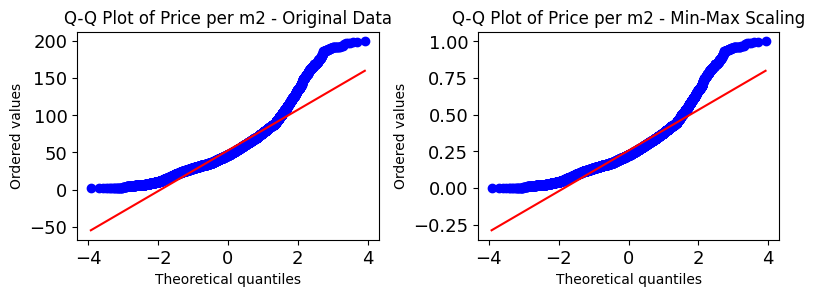

In [16]:
dfs = [df, df_minmax_scaled]
methods = ["Original Data", "Min-Max Scaling"]

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i)
    stats.probplot(data["Price per m2"], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Price per m2 - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.tight_layout()

plt.show()

In [17]:
df_final = df.copy()
columns_sqrt = ["Width", "Length", "Floors", "Rooms", "Toilets"]
df_final[columns_sqrt] = df_sqrt_transformed[columns_sqrt]
df_final["Price per m2"] = df_minmax_scaled["Price per m2"].values

df_final.head()

,Posted Time,Width,Length,Floors,Rooms,Toilets,Price per m2,1 Part Residential,All Residential,Back Expansion,...,House Direction_SOUTHWEST,House Direction_WEST,Furnishing Sell_BASIC_FINISHING,Furnishing Sell_FULLY_FURNISHED,Furnishing Sell_HIGH_END_FURNITURE,Furnishing Sell_RAW_HANDOVER,Land Type_AGRICULTURAL_LAND,Land Type_INDUSTRIAL_LAND,Land Type_PROJECT_LAND,Land Type_RESIDENTIAL_LAND
0,31/01/2025,2.236068,4.472136,0.0,0.0,0.0,0.001655,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,01/02/2025,2.236068,4.472136,0.0,0.0,0.0,0.001655,0,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,13/01/2025,2.236068,3.872983,0.0,0.0,0.0,0.007914,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,07/02/2025,2.236068,5.477226,0.0,0.0,0.0,0.002733,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,02/02/2025,2.236068,4.472136,0.0,0.0,0.0,0.014341,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [18]:
mins = minmax_scaler.data_min_
maxs = minmax_scaler.data_max_

scaler_stats = {
    'Metric': ['min', 'max'],
    'price': [mins[0], maxs[0]]
}

output_dir = '../../Backend/src/main/resources/'
os.makedirs(output_dir, exist_ok=True)

df_minmax_stats = pd.DataFrame(scaler_stats)
df_minmax_stats.to_csv('forecast_scaler_params.csv', index=False)

output_path = os.path.join(output_dir, 'forecast_scaler_params.csv')
df_minmax_stats.to_csv(output_path, index=False)

print("File 'forecast_scaler_params.csv' has been successfully created!")


File 'forecast_scaler_params.csv' has been successfully created!


In [19]:
df_final.to_csv('TransformedData.csv', index=False)
print("DataFrame exported to CSV file.")

DataFrame exported to CSV file.


# General conclusion